# PCA Step-by-Step Tutorial

This notebook demonstrates each step of the PCA (Principal Component Analysis) process on the Iris dataset. 
We will:
- Load and mean-center the data
- Compute the covariance matrix
- Calculate the eigenvalues and eigenvectors
- Sort and select the top components
- Transform the data
- Visualize the projected data

Let's start!

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Step 1: Load the Data

We will use the Iris dataset from sklearn for this PCA demonstration.

In [55]:
# Load Iris dataset
data = datasets.load_iris()
X = data.data
y = data.target
print(f"Shape of X: {X.shape}")
print(f"unique of y: {np.unique(y)}")


Shape of X: (150, 4)
unique of y: [0 1 2]


## Step 2: Mean Centering

Mean-centering the data ensures that each feature has a mean of zero.

In [39]:
# Mean centering
mean = np.mean(X, axis=0) # the mean of every feature
X_centered = X - mean
print("Mean of each feature after centering:", np.mean(X_centered, axis=0))

Mean of each feature after centering: [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


## Step 3: Calculate the Covariance Matrix

The covariance matrix shows the relationships between the features.

In [40]:
# Covariance matrix
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


## Step 4: Calculate Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors help in determining the principal components of the data.

In [41]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectors:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


## Step 5: Sort Eigenvalues and Eigenvectors

Sort eigenvalues in descending order to select the most important components.

In [ ]:
# Sort the eigenvalues and eigenvectors
idxs = np.argsort(eigenvalues)[::-1] # decreasing order 
print(idxs)
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[:, idxs]

print("Sorted Eigenvalues:", eigenvalues)
print("Sorted Eigenvectors:\n", eigenvectors)

[3 2 1 0]
Sorted Eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
Sorted Eigenvectors:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


## Step 6: Project the Data onto the Principal Components

Now, we select the top **k** components and project the data onto this new space.

In [48]:
# Select top k components
n_components = 2
top_eigenvectors = eigenvectors[:, :n_components]

# Project data onto top k components
X_projected = np.dot(X_centered, top_eigenvectors)
print("Shape of projected data:", X_projected.shape)

Shape of projected data: (150, 2)


## Step 7: Visualize the Projected Data

Let's plot the projected data onto the first two principal components.

C:\Users\hassa\AppData\Local\Temp\ipykernel_7452\2699401353.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor="k", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))


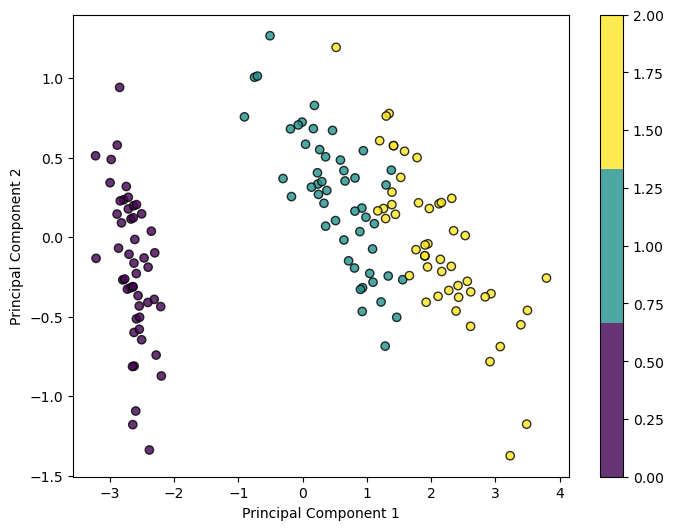

In [49]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, edgecolor="k", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()